# Connect G-Drive

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset yang digunakan
[link](https://www.kaggle.com/datasets/crxxom/all-animes-in-mal)

# Datset

In [65]:
import os
default_dir = "/content/drive/MyDrive/Colab Notebooks/Final_project_vector_team"
os.chdir(default_dir)

In [66]:
!ls

 assets					    Rekomendation_Anime.ipynb
'Copy of Final_project_vector_team.ipynb'   tmp
 Final_project_vector_team.ipynb


In [67]:
# Library
import numpy as np
import pandas as pd
import sklearn

#library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={"figure.figsize": (20, 15)}) # panjang 2o lebar 15
sns.set_style("whitegrid")
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [68]:
# Load Dataset
df = pd.read_csv("assets/mal_anime.csv")
print(f"Dataset shape:\n{df.shape}\n")

Dataset shape:
(24262, 18)



In [60]:
df.head()

,Unnamed: 0,title,episodes,status,theme,demographic,genres,type,favorites,popularity,rank,score,members,synopsis,aired,duration,premiered,studios
0,0,Fullmetal Alchemist: Brotherhood,64,Finished Airing,Military,Shounen,"Action,Adventure,Drama,Fantasy,",TV,"218,277",#3,#1,9.10,"3,190,961",After a horrific alchemy experiment goes wrong...,"Apr 5, 2009 to Jul 4, 2010",24 min. per ep.,Spring 2009,Bones
1,1,Steins;Gate,24,Finished Airing,Unknown,Unknown,"Drama,Sci-Fi,Suspense,",TV,"183,596",#13,#2,9.07,"2,452,142",Eccentric scientist Rintarou Okabe has a never...,"Apr 6, 2011 to Sep 14, 2011",24 min. per ep.,Spring 2011,White Fox
2,2,Bleach: Sennen Kessen-hen,13,Finished Airing,Unknown,Shounen,"Action,Adventure,Fantasy,",TV,"18,421",#458,#3,9.06,"455,428",Substitute Soul Reaper Ichigo Kurosaki spends ...,"Oct 11, 2022 to Dec 27, 2022",24 min. per ep.,Fall 2022,Pierrot
3,3,Gintama°,51,Finished Airing,Unknown,Shounen,"Action,Comedy,Sci-Fi,",TV,"16,042",#332,#4,9.06,"599,235","Gintoki, Shinpachi, and Kagura return as the f...","Apr 8, 2015 to Mar 30, 2016",24 min. per ep.,Spring 2015,Bandai Namco Pictures
4,4,Kaguya-sama wa Kokurasetai: Ultra Romantic,13,Finished Airing,School,Seinen,"Comedy,Romance,",TV,"29,397",#193,#5,9.05,"832,346",The elite members of Shuchiin Academy's studen...,"Apr 9, 2022 to Jun 25, 2022",23 min. per ep.,Spring 2022,A-1 Pictures


Deskripsi

1. title: title of the anime
2. episodes: number of episodes
3. status: whether the anime is still airing or finished airing already
4. theme: the theme of the anime
5. demographic: the demographic of the anime (eg. shonen, shojo, seinen and josei)
6. genres: genres of the anime
7. type: whether the anime is a tv show or movie etc
8. favorites: the number of authenticated users that favorited the anime
9. popularity: the ranking of the anime based on the total members count compare to other anime
10. rank: the ranking of the anime based on the score compare to other anime
11. score: the average score of all authenticated users that made a public vote on the anime
12. members: total number of people that added the anime to their personal anime list (eg. completed, watching, on-hold, dropped)
13. synopsis: plot of the anime
14. aired: when the anime is aired
15. duration: the duration of the anime eg. duration per episode
16. premiered: the season in which the anime is aired
17. studio: the studio that produces the anime

In [61]:
!pip install summarytools
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Unnamed: 0[int64],Mean (sd) : 12130.5 (7004.0)min < med < max:0.0 < 12130.5 < 24261.0IQR (CV) : 12130.5 (1.7),"24,262 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABkUlEQVR4nO3XsWrCUBxG8f8NVkyVBJHqA/QNHH2IPmwfwidw6NLJTZAQMVVabDoJDmpJl57h/NabLzfDQTC1bRsSRfbfHyBd6t07TCnlEdH/47uziPh26/aKz7ZtD9cObgaZUsonk8lLURTjrredTqeHpmmeR6PRe5ZlX27dXtrtdlVK6fValPd+IftFUYwXi8WhLMtjlwvX6/V4tVo9zefzt9lsVrl1e1bX9WC5XI63220/IjoFGRERZVkep9PpR5dLq6rKIyKGw6Fbt9fktw78UyMUgxSKQQrFIIVikEIxSKEYpFAMUigGKRSDFIpBCsUghWKQQjFIoRikUAxSKAYpFIMUikEKxSCFYpBCMUihGKRQDFIoBikUgxSKQQrFIIVikEIxSKEYpFAMUigGKRSDFIpBCsUghWKQQjFIoRikUAxSKAYpFIMUikEKxSCFYpBCMUihGKRQDFIoBikUgxSKQQrFIIVikEIxSKEYpFAMUigGKZTebw/UdT3o+tL9fj+IiGiaZrDZbB7duj37racfcVw52nKHlLgAAAAASUVORK5CYII="">",0(0.0%)
2,title[object],1. Crayon Shin-chan Movie 03: Unk2. Kimi no Na wo Yobeba3. Man Jie Guoxue Xilie: Chengyu 4. Man Jie Guoxue Xilie: Yuyan Gu5. Man Shu Lan Liuliu6. Man with a Mission Animated Sh7. Man Youqu8. Manabu no Natsuyasumi9. Ima10. Ima demo Senchou to Yobarete I11. other,"2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)24,242 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
3,episodes[object],1. 12. 123. 24. 265. 136. 527. 38. 49. Unknown10. 611. other,"11,269 (46.4%)1,935 (8.0%)1,308 (5.4%)1,199 (4.9%)990 (4.1%)808 (3.3%)657 (2.7%)522 (2.2%)520 (2.1%)408 (1.7%)4,646 (19.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEO0lEQVR4nO3dwU4TbQCG0alpiG7aEJJeTC/Ci/UiejcNaRdi3PRf/GpACkiZeUroOTtXTszjR2byvTo7HA4DFD6d+wG4HGIjIzYyYiMjNjJiIyM2MmIjIzYys2EYvgzDcHXuB3nHfh4Oh7tzP8RHML+5ufm6WCyuz/0g79V+v7+dzWbfBPd288Vicb1er++Wy+WPcz/Me7Pb7T5vNpvr7XZ7NQyD2N5oPgzDsFwuf6xWq+/nfph36su5H+Cj8IJARmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxk5sPw/72tcz/Ie+TPZVzz/X5/u9lsrgf3to7a7/e3wzD8PPdzfAQ2CC+zQRjJzD+ZReWUk83fdE7y6nWVtRGnetW6ytqItzhlXeWtlZP4qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbmVYMXAxDe4tWDFwMQTuVaOBmDFzL/crI5yRjFi4MXAxfG8uzgxcCFMf3L4MXAhVH4qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbm2cGLgQtjenHwYuDCWFwLJ2PwQsYLAhk/RslYV5GxriJjXUXGCwIZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVkXAsnY11F5rmTzYnGqJ4cvBi6MLajgxdDF6bw3ODF0IVR+ahLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5ujgxdCFKTw5eDF0YWyuhZMxeCHz1MnmVGN0Rwcvxi5M4dHgxdiFqTw1eDF2YXQ+6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5lH6yrLKqZydF1lWcUUbBDIWFeROXayOdWYxKN1lWUVU3m

**Quality**

1. Episode
- objek to int
- Ada 'Unkown' = 520

2. Theme
- True     14805 (unknow)
- False     9457

3. Demographic
- Unkown = 14877

4. Genres
- Unkown = 4914

5. Type
- Unkown = 56

6. Favorites
- Obj to int
- Uknown = 0

7. Popularity
- Obj to int
- Uknown = 0
- Del #

8. Rank
- Obj to int
- Uknown = 0
- Del #

9. Member
- Obj - int

10. Duration
-  unkown =  583

11. Premiered
- True     16653
- False     7609



#1.Hapus kolom yang tidak memiliki pengaruh untuk hasil prediksi.


In [69]:
# kolom tidak berpengaruh
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('synopsis',axis=1, inplace=True)
df.drop('episodes',axis=1, inplace=True)

df.drop('premiered',axis=1, inplace=True) # nilai other/Nan >= 99.8%
df.drop('rank',axis=1, inplace=True) # nilai other/Nan >= 99.8%
df.drop('popularity', axis=1, inplace=True) # nilai other/Nan >= 99.8%

In [70]:
def columns_info(df):
  cols=[]
  dtypes=[]
  nunique=[]
  nulls=[]
  for col in df.columns:
    cols.append(col)
    dtypes.append(df[col].dtypes)
    nunique.append(df[col].nunique())
    nulls.append(df[col].isna().sum())
  return pd.DataFrame({'Columns' : cols,
                       'Data Types' : dtypes,
                       'Numbers of Unique' : nunique,
                       'Numbers of Nulls' : nulls})
columns_info(df)

,Columns,Data Types,Numbers of Unique,Numbers of Nulls
0,title,object,24223,0
1,status,object,3,0
2,theme,object,51,0
3,demographic,object,6,0
4,genres,object,962,0
5,type,object,7,0
6,favorites,object,1826,0
7,score,float64,564,8968
8,members,object,10930,0
9,aired,object,14745,0


In [71]:
df.duplicated().sum()

37

menghapus baris yang memiliki data duplicate

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  24225
Number of columns:  12


#2.Ubah Tipe Data

In [74]:
# Menghitung jumlah <NA> pada kolom 'score'
na_count = df['score'].isna().sum()

print("Jumlah <NA> pada kolom 'score':", na_count)

Jumlah <NA> pada kolom 'score': 8949


In [75]:
# Menghapus baris dengan nilai NaN pada kolom 'rank'
df = df.dropna(subset=['score'])

In [76]:
# Menghitung nilai quartile
Q1 = df['score'].quantile(0.20)
Q2 = df['score'].quantile(0.40)
Q3 = df['score'].quantile(0.60)
Q4 = df['score'].quantile(0.80)

# Definisikan bins berdasarkan quartile
bins = [0, Q1, Q2, Q3, Q4, float('inf')]

# Definisikan label untuk setiap kategori
labels = ['1+', '2+', '3+', '4+', '5+']

# Buat kolom baru 'rank_category' untuk menyimpan kategori rank
df['score_category'] = pd.cut(df['score'], bins=bins, labels=labels)

print(df)

                                            title           status     theme  \
0                Fullmetal Alchemist: Brotherhood  Finished Airing  Military   
1                                     Steins;Gate  Finished Airing   Unknown   
2                       Bleach: Sennen Kessen-hen  Finished Airing   Unknown   
3                                        Gintama°  Finished Airing   Unknown   
4      Kaguya-sama wa Kokurasetai: Ultra Romantic  Finished Airing    School   
...                                           ...              ...       ...   
24257                            Rape Gouhouka!!!  Finished Airing   Unknown   
24258                           Rape! Rape! Rape!  Finished Airing   Unknown   
24259            Seikoujo: Haitoku no Biden Dorei  Finished Airing   Unknown   
24260             Chikan Juunin-tai The Animation  Finished Airing   Unknown   
24261                                        Gibo  Finished Airing   Unknown   

      demographic                      

In [77]:
# Remove commas and convert 'favorit' column to integer data type
df['favorites'] = df['favorites'].apply(lambda x: int(str(x).replace(',', '')))

In [78]:
# Menghapus tanda koma (,) pada kolom 'member' dan mengubah tipe data dari objek ke float
df['members'] = df['members'].astype(str).str.replace(',', '').astype(float)

# Mengubah kolom 'members' menjadi tipe data integer
df['members'] = df['members'].astype(int)

### 2.3.4 Columns 'Aired'

#### 2.3.4.1 Split Columns

In [16]:
df['aired'].unique()

array(['Apr 5, 2009 to Jul 4, 2010', 'Apr 6, 2011 to Sep 14, 2011',
       'Oct 11, 2022 to Dec 27, 2022', ...,
       'Apr 25, 2006 to Dec 25, 2006', 'Jul 8, 2004 to Aug 7, 2004',
       'Oct 5, 2001 to Jan 11, 2002'], dtype=object)

In [17]:
# Membuat kolom 'aired_start' dan 'aired_end' dengan tanggal awal dan akhir rentang
df[['aired_start', 'aired_end']] = df['aired'].str.split(' to ', expand=True)

In [18]:
# Menghapus kolom 'aired'
df.drop(columns=['aired'], inplace=True)
df.head()

,title,status,theme,demographic,genres,type,favorites,score,members,duration,studios,score_category,aired_start,aired_end
0,Fullmetal Alchemist: Brotherhood,Finished Airing,Military,Shounen,"Action,Adventure,Drama,Fantasy,",TV,218277,9.10,3190961,24 min. per ep.,Bones,5+,"Apr 5, 2009","Jul 4, 2010"
1,Steins;Gate,Finished Airing,Unknown,Unknown,"Drama,Sci-Fi,Suspense,",TV,183596,9.07,2452142,24 min. per ep.,White Fox,5+,"Apr 6, 2011","Sep 14, 2011"
2,Bleach: Sennen Kessen-hen,Finished Airing,Unknown,Shounen,"Action,Adventure,Fantasy,",TV,18421,9.06,455428,24 min. per ep.,Pierrot,5+,"Oct 11, 2022","Dec 27, 2022"
3,Gintama°,Finished Airing,Unknown,Shounen,"Action,Comedy,Sci-Fi,",TV,16042,9.06,599235,24 min. per ep.,Bandai Namco Pictures,5+,"Apr 8, 2015","Mar 30, 2016"
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,Finished Airing,School,Seinen,"Comedy,Romance,",TV,29397,9.05,832346,23 min. per ep.,A-1 Pictures,5+,"Apr 9, 2022","Jun 25, 2022"


### 2.3.5 Columns 'durations'

In [19]:
# Fungsi untuk mengonversi format "1 hr. 24 min. per ep." menjadi jam
def convert_to_hours(duration_str):
    parts = duration_str.split()
    hours = 0

    for i in range(len(parts)):
        if parts[i] == "hr.":
            hours = int(parts[i-1])

    return hours

# Menambahkan kolom "duration(hours)"
df["duration(hours)"] = df["duration"].apply(convert_to_hours)

# Ubah jam ke menit
df["duration(m)"] = df["duration"].apply(convert_to_hours)*60
print(df[['duration(hours)', 'duration(m)']])

       duration(hours)  duration(m)
0                    0            0
1                    0            0
2                    0            0
3                    0            0
4                    0            0
...                ...          ...
24257                0            0
24258                0            0
24259                0            0
24260                0            0
24261                0            0

[15276 rows x 2 columns]


In [20]:
# Fungsi untuk mengonversi format "1 hr. 24 min. per ep." menjadi menit
def convert_to_minutes(duration_str):
    parts = duration_str.split()
    minutes = 0

    for i in range(len(parts)):
        if parts[i] == "min.":
            minutes = int(parts[i-1])

    return minutes

# Memanggil fungsi untuk mengonversi ke menit
df["duration(minute)"] = df["duration"].apply(convert_to_minutes)

In [21]:
# Menambahkan kolom baru 'duration_eps(minutes)'
df.insert(df.columns.get_loc('duration')+1, 'duration_eps(minutes)', df['duration(m)'] + df['duration(minute)'])

# Menampilkan DataFrame yang telah ditambahkan dua kolom baru
print(df[['duration', 'duration(hours)','duration(m)', 'duration(minute)', 'duration_eps(minutes)']].head(20))

                duration  duration(hours)  duration(m)  duration(minute)  \
0        24 min. per ep.                0            0                24   
1        24 min. per ep.                0            0                24   
2        24 min. per ep.                0            0                24   
3        24 min. per ep.                0            0                24   
4        23 min. per ep.                0            0                23   
5        23 min. per ep.                0            0                23   
6   1 hr. 1 min. per ep.                1           60                 1   
7        24 min. per ep.                0            0                24   
8          1 hr. 44 min.                1           60                44   
9        23 min. per ep.                0            0                23   
10       24 min. per ep.                0            0                24   
11       26 min. per ep.                0            0                26   
12       23 

In [22]:
#hapus kolom yang tidak digunakan lagi
# kolom 'duration', 'duration(hours), dan duration('minute')

df.drop(columns=['duration', 'duration(hours)','duration(m)',
               'duration(minute)'],inplace=True)

array([[<Axes: title={'center': 'favorites'}>,
        <Axes: title={'center': 'score'}>],
       [<Axes: title={'center': 'members'}>,
        <Axes: title={'center': 'duration_eps(minutes)'}>]], dtype=object)

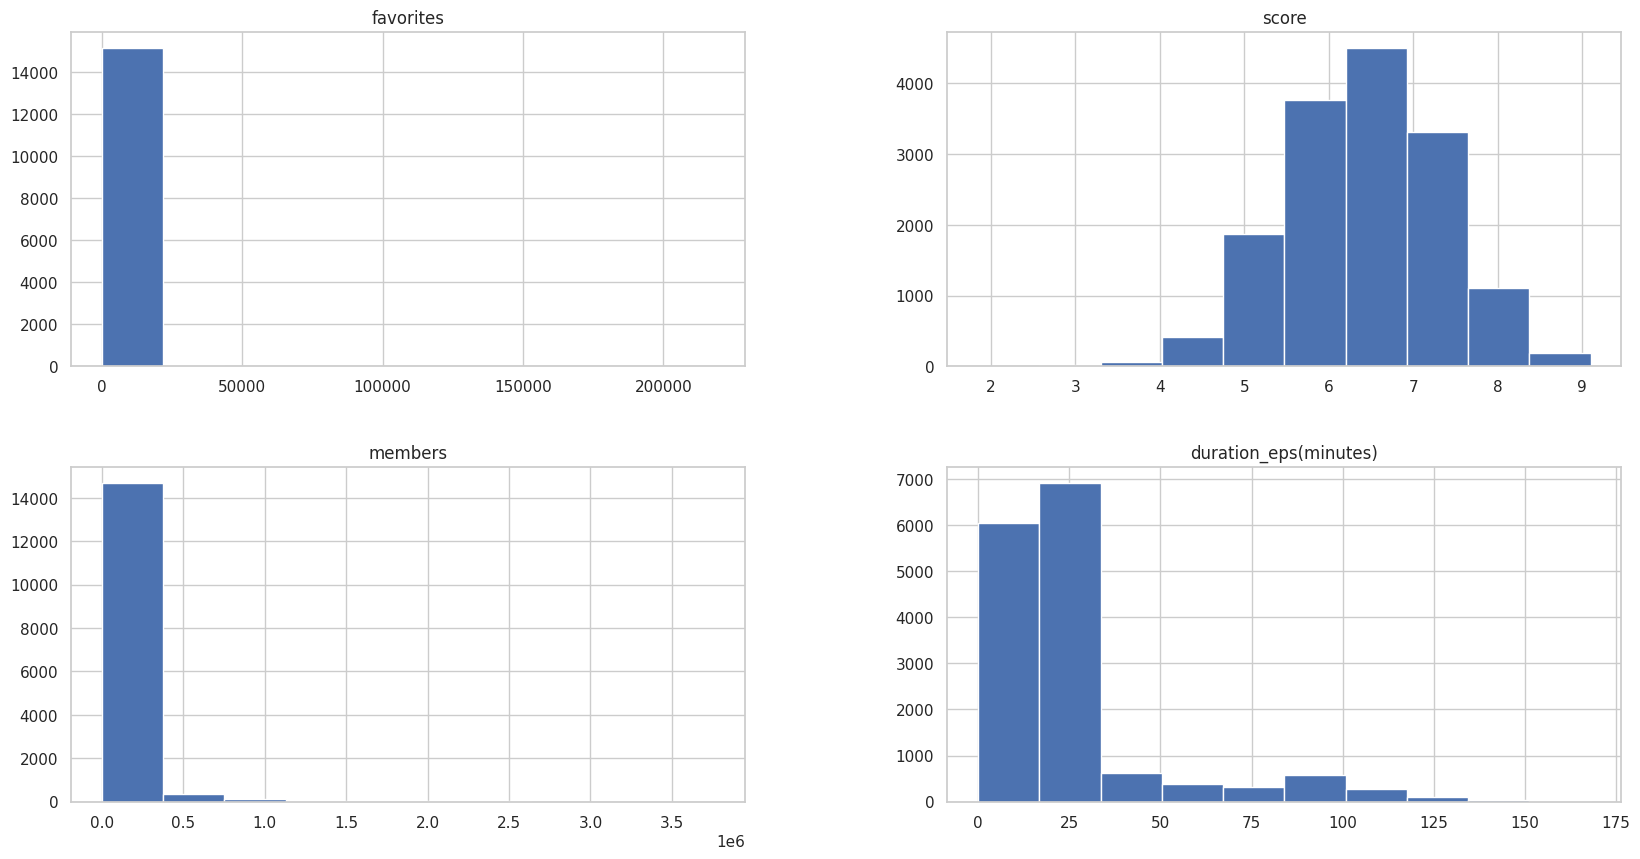

In [23]:
df.hist(figsize = (20,10))

# 2.EDA

In [79]:
df2 = df.copy()

## 2.1 Encoding

In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15276 entries, 0 to 24261
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   title           15276 non-null  object  
 1   status          15276 non-null  int64   
 2   theme           15276 non-null  int64   
 3   demographic     15276 non-null  int64   
 4   genres          15276 non-null  object  
 5   type            15276 non-null  int64   
 6   favorites       15276 non-null  int64   
 7   score           15276 non-null  float64 
 8   members         15276 non-null  int64   
 9   aired           15276 non-null  object  
 10  duration        15276 non-null  object  
 11  studios         15276 non-null  object  
 12  score_category  15276 non-null  category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 2.0+ MB


In [86]:
# Menggunakan metode factorize untuk melakukan pemetaan pada kolom 'status', 'theme', 'demographic', dan 'type'
df2['status'], unique_status_codes = pd.factorize(df2['status'])
df2['theme'], unique_theme_codes = pd.factorize(df2['theme'])
df2['demographic'], unique_demographic_codes = pd.factorize(df2['demographic'])
df2['type'], unique_type_codes = pd.factorize(df2['type'])

# Melihat pemetaan antara kategori untuk status
print("Pemetaan kategori untuk status:")
for label, category in enumerate(unique_status_codes):
    print(f"{category}: {label}")

# Melihat pemetaan antara kategori untuk theme
print("\nPemetaan kategori untuk theme:")
for label, category in enumerate(unique_theme_codes):
    print(f"{category}: {label}")

# Melihat pemetaan antara kategori untuk demographic
print("\nPemetaan kategori untuk demographic:")
for label, category in enumerate(unique_demographic_codes):
    print(f"{category}: {label}")

# Melihat pemetaan antara kategori untuk type
print("\nPemetaan kategori untuk type:")
for label, category in enumerate(unique_type_codes):
    print(f"{category}: {label}")

Pemetaan kategori untuk status:
0: 0
1: 1

Pemetaan kategori untuk theme:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8
9: 9
10: 10
11: 11
12: 12
13: 13
14: 14
15: 15
16: 16
17: 17
18: 18
19: 19
20: 20
21: 21
22: 22
23: 23
24: 24
25: 25
26: 26
27: 27
28: 28
29: 29
30: 30
31: 31
32: 32
33: 33
34: 34
35: 35
36: 36
37: 37
38: 38
39: 39
40: 40
41: 41
42: 42
43: 43
44: 44
45: 45
46: 46
47: 47
48: 48
49: 49
50: 50

Pemetaan kategori untuk demographic:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5

Pemetaan kategori untuk type:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6


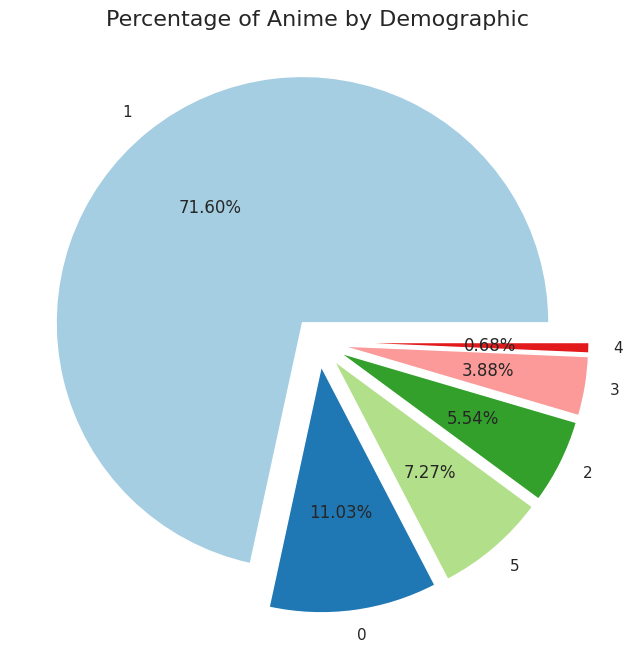

In [87]:
# Factorize the 'demographic' column to convert it into numeric codes
df2['demographic'], unique_demographic_codes = pd.factorize(df2['demographic'])

# Membuat mapping antara nilai yang di-factorize dengan label aslinya
mapping_demographic = dict(enumerate(unique_demographic_codes))

# Menampilkan jumlah anime berdasarkan jenis demographicnya dalam bentuk pie chart
demographic_counts = df2['demographic'].value_counts()
explode = [0.1] * len(demographic_counts)  # Nilai explode untuk menampilkan slice yang ditekankan
colors = plt.cm.Paired(range(len(demographic_counts)))

plt.figure(figsize=(8, 8))
plt.pie(demographic_counts, labels=demographic_counts.index.map(mapping_demographic), autopct='%1.2f%%', explode=explode, colors=colors)
plt.title('Percentage of Anime by Demographic', fontsize=16)
plt.show()

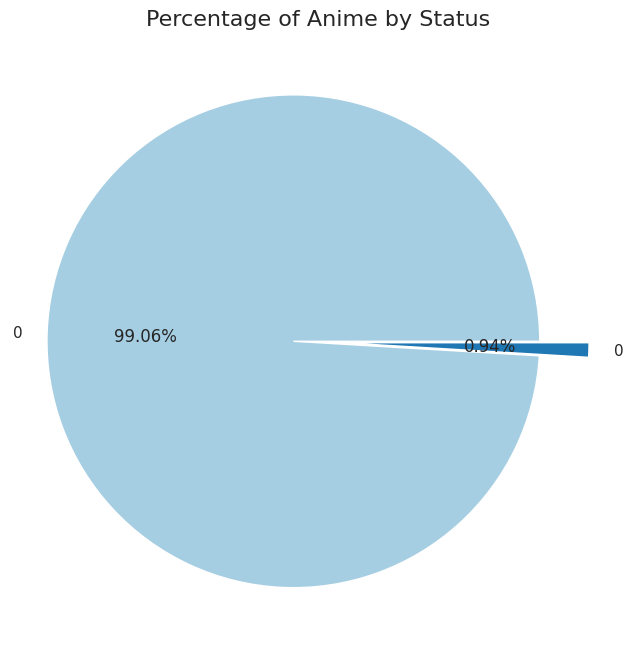

In [88]:
# Meng-encoding kolom
df2['status'], unique_codes = pd.factorize(df2['status'])

# Membuat mapping antara nilai yang di-factorize dengan label aslinya
mapping_status = dict(enumerate(unique_status_codes))

# Menampilkan jumlah anime berdasarkan jenis demographicnya dalam bentuk pie chart
status_counts = df2['status'].value_counts()
explode = [0.1] * len(status_counts)  # Nilai explode untuk menampilkan slice yang ditekankan
colors = plt.cm.Paired(range(len(status_counts)))

plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index.map(df2['status']), autopct='%1.2f%%', explode=explode, colors=colors)
plt.title('Percentage of Anime by Status', fontsize=16)
plt.show()

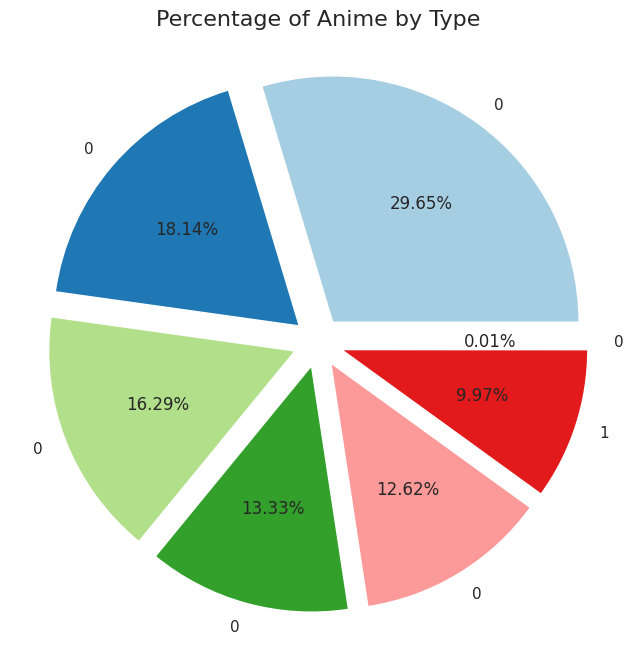

In [89]:
# Meng-encoding kolom
df2['type'], unique_codes = pd.factorize(df2['type'])

# Membuat mapping antara nilai yang di-factorize dengan label aslinya
mapping_type = dict(enumerate(unique_type_codes))

# Menampilkan jumlah anime berdasarkan jenis demographicnya dalam bentuk pie chart
type_counts = df2['type'].value_counts()
explode = [0.1] * len(type_counts)  # Nilai explode untuk menampilkan slice yang ditekankan
colors = plt.cm.Paired(range(len(type_counts)))

plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index.map(df2['type']), autopct='%1.2f%%', explode=explode, colors=colors)
plt.title('Percentage of Anime by Type', fontsize=16)
plt.show()

In [90]:
# Gunakan metode factorize() untuk melakukan pemetaan otomatis
df['theme'], unique_status_codes = pd.factorize(df['theme'])

print("status_numb:", unique_codes)
print("theme_numb:", unique_codes)
print("demographic_numb:", unique_codes)
print("type_numb:", unique_codes)

status_numb: Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')
theme_numb: Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')
demographic_numb: Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')
type_numb: Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


#3.Visualization

In [91]:
df['score'].value_counts()

6.51    99
6.09    80
6.30    80
6.58    78
6.52    75
        ..
3.88     1
3.89     1
3.91     1
3.93     1
3.03     1
Name: score, Length: 564, dtype: int64

In [92]:
df2['demographic'].value_counts()

1    10938
0     1685
5     1110
2      847
3      592
4      104
Name: demographic, dtype: int64

In [93]:
demographic_counts = df2['demographic'].value_counts()
demographic_counts

1    10938
0     1685
5     1110
2      847
3      592
4      104
Name: demographic, dtype: int64

Text(0.5, 1.0, 'Percentage of Anime by Demographic')

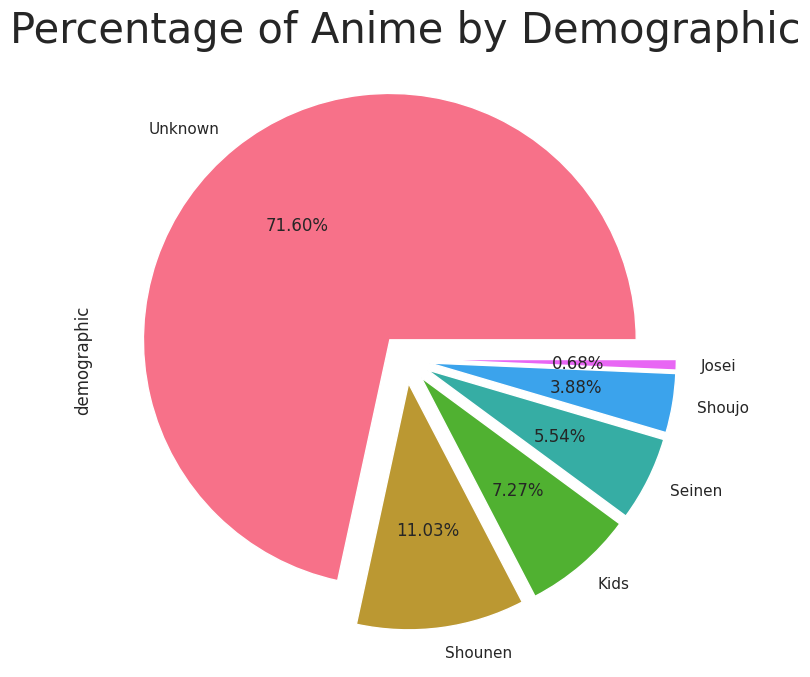

In [94]:
#Menampilkan jumlah anime berdasarkan jenis demographicnya untuk mengetahui rentang umur bagi penontonnya secara presentase

plt.figure(figsize=(8, 8))
demographic_counts = df['demographic'].value_counts()
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
colors = sns.color_palette('husl')

demographic_counts.plot(kind='pie', autopct='%1.2f%%', explode = explode, colors=colors).set_title('Percentage of Anime by Demographic', fontdict={'size' : 30})

In [95]:
type_demographic = df2.groupby('type')['demographic'].value_counts()
type_demographic

type  demographic
0     1              2759
      0               728
      2               384
      5               333
      3               268
      4                57
1     1              1407
      0               309
      2               130
      5                93
      3                79
      4                18
2     1              1718
      0               303
      5               272
      2               103
      3                86
      4                 6
3     1              2037
      0               284
      2               181
      3               133
      5               123
      4                13
4     1              1707
      5                89
      0                61
      2                44
      3                17
      4                10
5     1                 1
6     1              1309
      5               200
      3                 9
      2                 5
Name: demographic, dtype: int64

<Figure size 500x500 with 0 Axes>

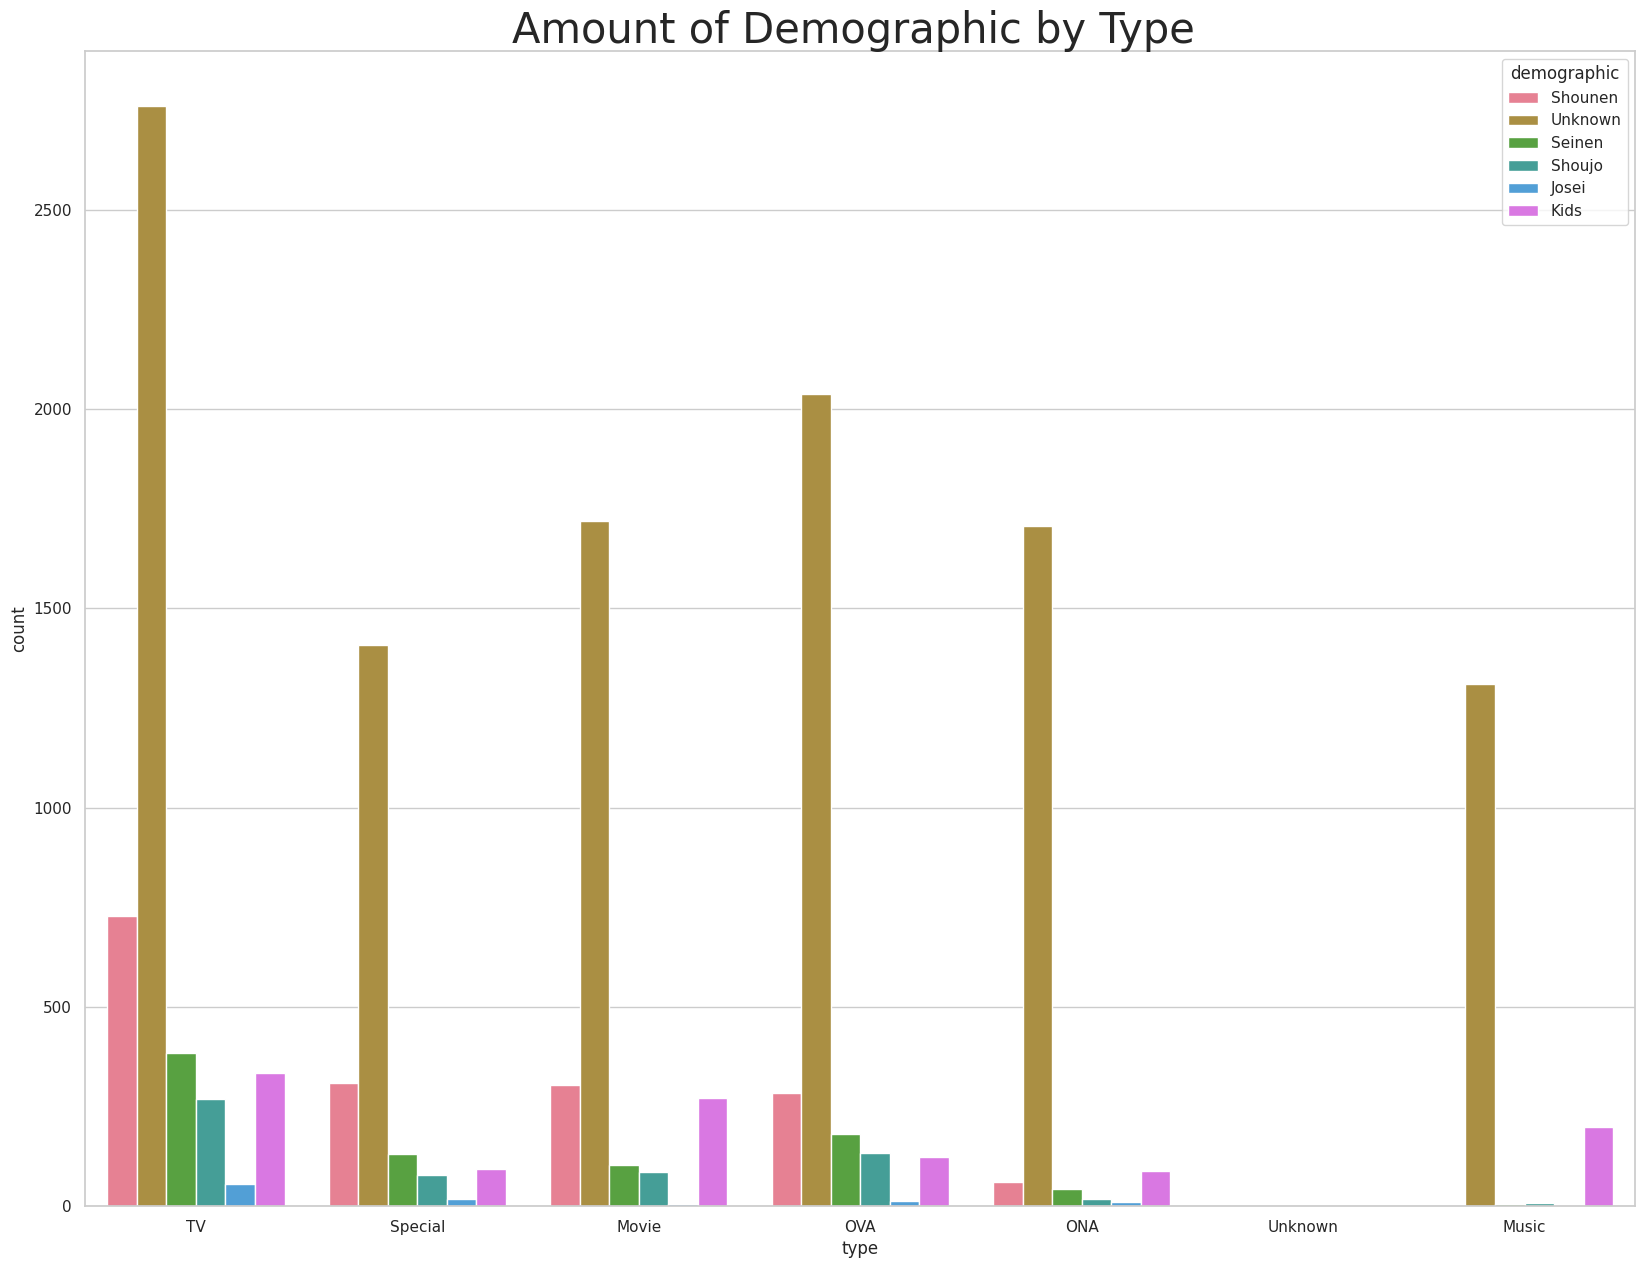

In [96]:
#Menampilkan banyaknya demographic anime berdasarkan typenya
plt.figure(figsize=(5,5))
f, ax = plt.subplots(1, 1)
ax = sns.countplot(data=df,x='type', hue='demographic',  palette='husl').set_title('Amount of Demographic by Type ', fontdict={'size' : 30})

In [97]:
df2['studios'].nunique()

1315

In [98]:
 studio_counts = df2['studios'].value_counts().head(5)
 studio_counts

None found, add some    3445
Toei Animation           699
Sunrise                  509
J.C.Staff                360
Madhouse                 325
Name: studios, dtype: int64

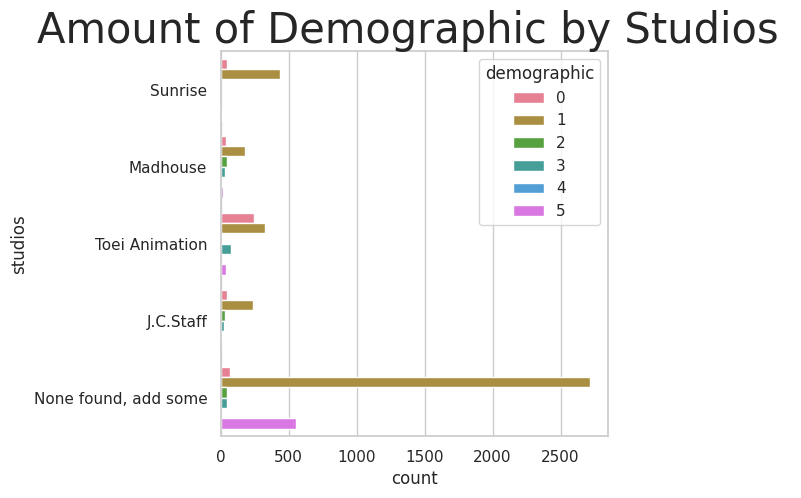

In [99]:
#Menampilkan grafik top 5 Studios berdasarkan Demographicnya

df_top5studios = df2.loc[(df2['studios']=='None found, add some')|
                (df2['studios']=='Toei Animation')|
                (df2['studios']=='Sunrise')|
                (df2['studios']=='J.C.Staff')|
                (df2['studios']=='Madhouse'), : ]
f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.countplot(data =df_top5studios, y='studios', hue='demographic',  palette='husl').set_title('Amount of Demographic by Studios ', fontdict={'size' : 30})

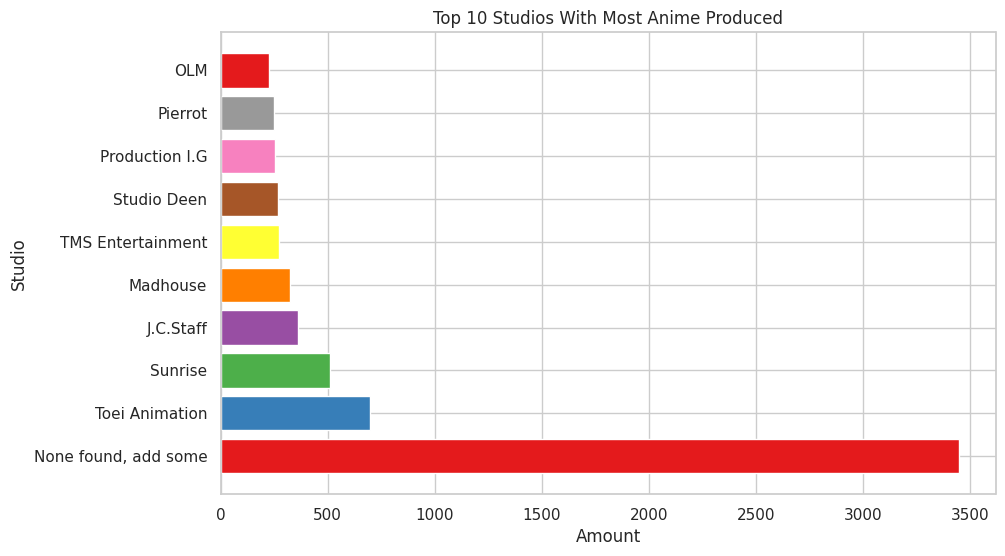

In [100]:
#Menampilkan anime berdasarkan studio
studio_counts = df2['studios'].value_counts().head(10)  # Top 10 studios

plt.figure(figsize=(10, 6))
plt.barh(studio_counts.index, studio_counts.values, color = sns.color_palette("Set1"))
plt.title('Top 10 Studios With Most Anime Produced')
plt.xlabel('Amount')
plt.ylabel('Studio')
plt.show()

In [101]:
import matplotlib.dates as mdates

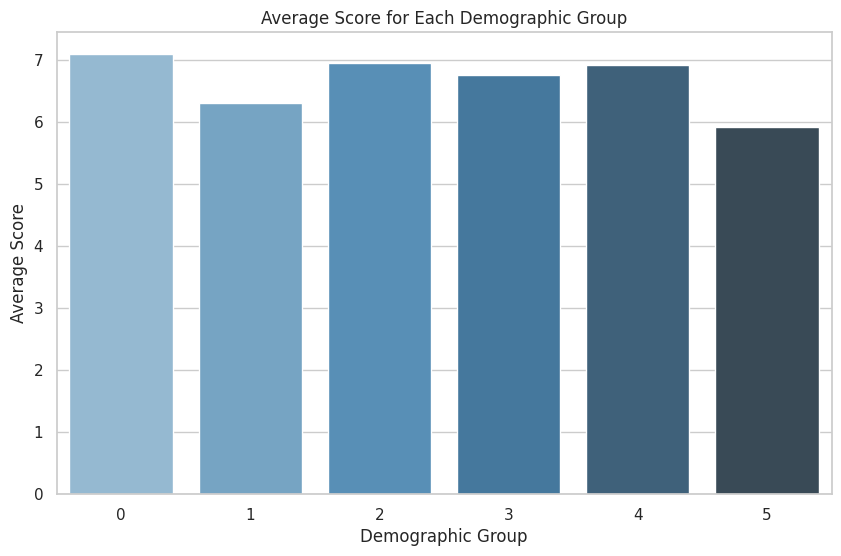

In [102]:
# Calculate the average score for each demographic group
average_scores = df2.groupby('demographic')['score'].mean()

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_scores.index, y=average_scores.values, palette="Blues_d")
plt.title('Average Score for Each Demographic Group')
plt.xlabel('Demographic Group')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

In [103]:
print('Top 10 Highest Ranked Anime')
df2[['title', 'score','demographic','studios','type']].sort_values('score', ascending=False).head(10)

Top 10 Highest Ranked Anime


,title,score,demographic,studios,type
0,Fullmetal Alchemist: Brotherhood,9.10,0,Bones,0
1,Steins;Gate,9.07,1,White Fox,0
2,Bleach: Sennen Kessen-hen,9.06,0,Pierrot,0
3,Gintama°,9.06,0,Bandai Namco Pictures,0
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,9.05,2,A-1 Pictures,0
5,Shingeki no Kyojin Season 3 Part 2,9.05,0,Wit Studio,0
6,Shingeki no Kyojin: The Final Season - Kankets...,9.04,0,MAPPA,1
7,Gintama',9.04,0,Sunrise,0
8,Gintama: The Final,9.04,0,Bandai Namco Pictures,2
9,Hunter x Hunter (2011),9.04,0,Madhouse,0


Text(0.5, 1.0, 'Amount of Anime by Score (Median Score = 6.42)')

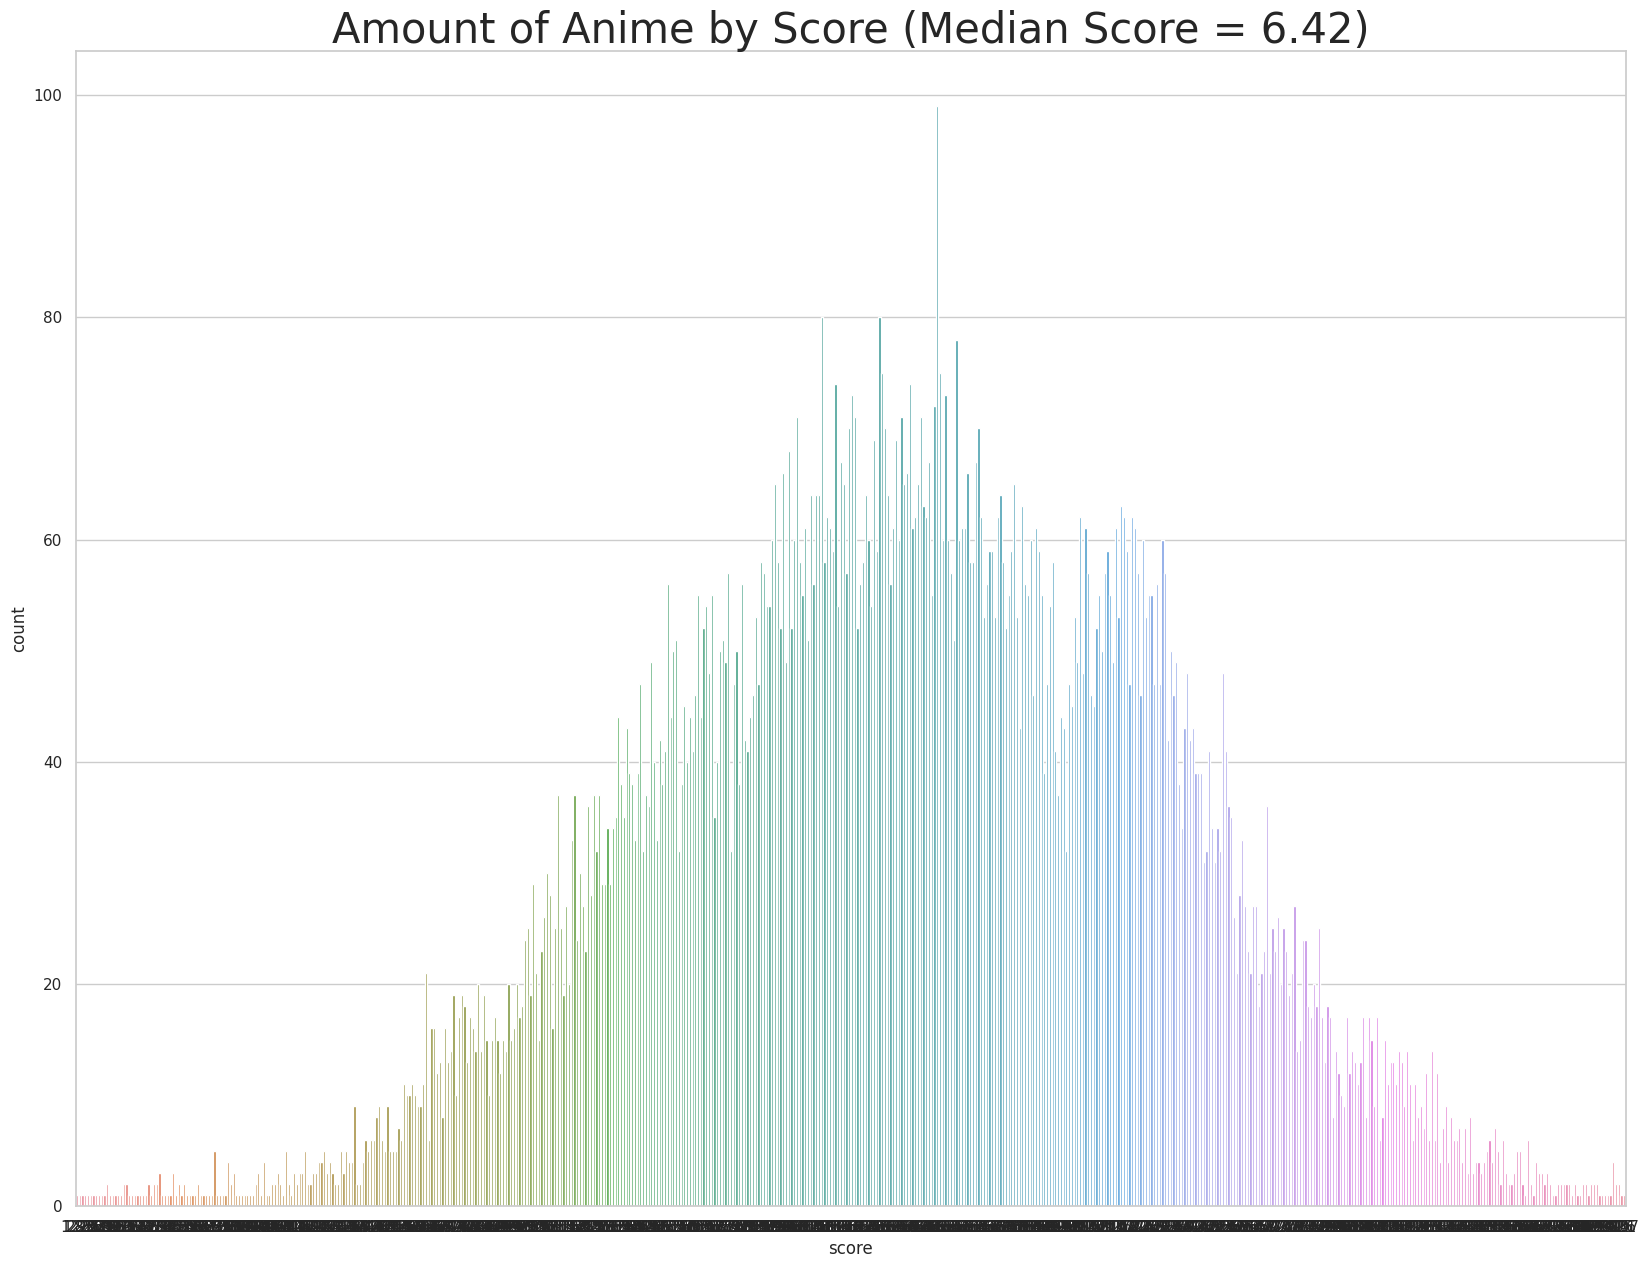

In [104]:
score_counts = df['score'].value_counts()
score_counts
df['score'].median()
#Menampilkan jumlah anime berdasarkan jenis score

sns.countplot( data = df, x = 'score', palette = 'husl').set_title('Amount of Anime by Score (Median Score = 6.42)', fontdict={'size' : 30})

# 4.Modeling

## 4.1 Numerik

In [105]:
# Mengambil semua kolom dengan tipe data numerik
numeric_columns = df2.select_dtypes(include='number')

# Menghilangkan kolom non-numerik dari DataFrame
df2_numeric = df2[numeric_columns.columns]

# Standarisasi data numerik menggunakan StandardScaler
scaler = StandardScaler()
df2_std = scaler.fit_transform(df2_numeric)
df2_std = pd.DataFrame(data=df2_std, index=df.index, columns=df2_numeric.columns)

print(df2_std)

         status     theme  demographic      type  favorites     score  \
0     -0.097551 -0.692738    -1.114044 -1.111830  39.088775  2.916570   
1     -0.097551 -0.606037    -0.278757 -1.111830  32.857969  2.883955   
2     -0.097551 -0.606037    -1.114044 -1.111830   3.182541  2.873083   
3     -0.097551 -0.606037    -1.114044 -1.111830   2.755129  2.873083   
4     -0.097551 -0.519336     0.556530 -1.111830   5.154495  2.862211   
...         ...       ...          ...       ...        ...       ...   
24257 -0.097551 -0.606037    -0.278757  0.999334  -0.123751 -0.605872   
24258 -0.097551 -0.606037    -0.278757  0.471543  -0.120517 -0.605872   
24259 -0.097551 -0.606037    -0.278757  0.471543  -0.125189 -0.605872   
24260 -0.097551 -0.606037    -0.278757  0.471543  -0.125728 -0.605872   
24261 -0.097551 -0.606037    -0.278757  0.471543  -0.124111 -0.605872   

         members  
0      15.820206  
1      12.086686  
2       1.996565  
3       2.723274  
4       3.901269  
...      

## 4.2 Categoric

In [106]:
df2['score_category']

0        5+
1        5+
2        5+
3        5+
4        5+
         ..
24257    2+
24258    2+
24259    2+
24260    2+
24261    2+
Name: score_category, Length: 15276, dtype: category
Categories (5, object): ['1+' < '2+' < '3+' < '4+' < '5+']

In [110]:
categorical_columns = df2.select_dtypes(include='category').columns.tolist()

print(categorical_columns)

# Convert categorical_columns to the underlying data type (object) before slicing
df2_encode = df2[categorical_columns].copy()

for col in categorical_columns:
    df2_encode[col] = LabelEncoder().fit_transform(df2_encode[col])

['score_category']


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15276 entries, 0 to 24261
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   title           15276 non-null  object  
 1   status          15276 non-null  object  
 2   theme           15276 non-null  int64   
 3   demographic     15276 non-null  object  
 4   genres          15276 non-null  object  
 5   type            15276 non-null  object  
 6   favorites       15276 non-null  int64   
 7   score           15276 non-null  float64 
 8   members         15276 non-null  int64   
 9   aired           15276 non-null  object  
 10  duration        15276 non-null  object  
 11  studios         15276 non-null  object  
 12  score_category  15276 non-null  category
dtypes: category(1), float64(1), int64(3), object(8)
memory usage: 2.0+ MB


In [118]:
df2_model= df2_encode.merge(df2_std, left_index = True, right_index=True, how= 'left')
print(df2_model.head(10))

   score_category     status     theme  demographic      type  favorites  \
0               4  -0.097551 -0.692738    -1.114044 -1.111830  39.088775   
1               4  -0.097551 -0.606037    -0.278757 -1.111830  32.857969   
2               4  -0.097551 -0.606037    -1.114044 -1.111830   3.182541   
3               4  -0.097551 -0.606037    -1.114044 -1.111830   2.755129   
4               4  -0.097551 -0.519336     0.556530 -1.111830   5.154495   
5               4  -0.097551 -0.606037    -1.114044 -1.111830   9.823872   
6               4  10.251016 -0.606037    -1.114044 -0.584039   1.553020   
7               4  -0.097551 -0.606037    -1.114044 -1.111830   1.274547   
8               4  -0.097551 -0.606037    -1.114044 -0.056248   0.604233   
9               4  -0.097551 -0.606037    -1.114044 -1.111830  36.003285   

      score    members  
0  2.916570  15.820206  
1  2.883955  12.086686  
2  2.873083   1.996565  
3  2.873083   2.723274  
4  2.862211   3.901269  
5  2.862211  

4.3.1 Modeling Process

4.3 Model apa yang digunakan ? CLUSTERING KMeans

In [119]:
# Checking for NaN values in each column of df2_model
nan_columns = df2_model.columns[df2_model.isna().any()].tolist()

print("Columns with NaN values:", nan_columns)

Columns with NaN values: []


In [120]:
# Handle NaN values if present in df2_model
df2_model.dropna(inplace=True)

In [121]:
# Modeling
range_clusters = list(range(2, 16))
inertia = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2_model)
    inertia.append(kmeans.inertia_)

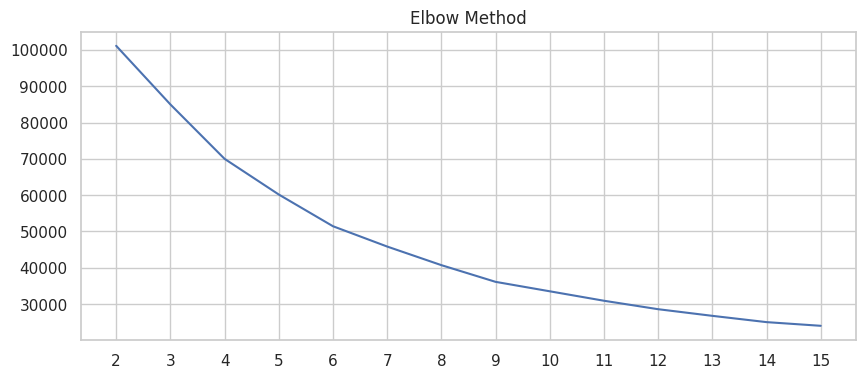

In [116]:
# Menampilkan grafik Elbow Method
plt.figure(figsize=(10, 4))
plt.plot(range_clusters, inertia)
plt.xticks(range_clusters)
plt.title('Elbow Method')
plt.show()

In [122]:
# Melakukan K-Means clustering dengan 3 kluster pada df2_model (pastikan df2_model sesuai dengan df2)
kmeans = KMeans(n_clusters=4)
kmeans.fit(df2_model)

# Membuat salinan DataFrame df2 untuk hasil K-Means
df2_kmeans = df2.copy()

# Mendapatkan label kluster untuk setiap baris
labels = kmeans.labels_

# Menambahkan kolom 'Cluster' ke DataFrame df_kmeans
df2_kmeans['Cluster'] = labels

# Menampilkan 20 baris teratas dari DataFrame df_kmeans
print(df2_kmeans.head(20))

                                                title  status  theme  \
0                    Fullmetal Alchemist: Brotherhood       0      0   
1                                         Steins;Gate       0      1   
2                           Bleach: Sennen Kessen-hen       0      1   
3                                            Gintama°       0      1   
4          Kaguya-sama wa Kokurasetai: Ultra Romantic       0      2   
5                  Shingeki no Kyojin Season 3 Part 2       0      1   
6   Shingeki no Kyojin: The Final Season - Kankets...       1      1   
7                                            Gintama'       0      1   
8                                  Gintama: The Final       0      1   
9                              Hunter x Hunter (2011)       0      1   
10                                Gintama': Enchousen       0      1   
11                               Ginga Eiyuu Densetsu       0      1   
12                           Fruits Basket: The Final       0   

In [123]:
df2['demographic'].nunique()

6

In [124]:
print(df2_kmeans.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15276 entries, 0 to 24261
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   title           15276 non-null  object  
 1   status          15276 non-null  int64   
 2   theme           15276 non-null  int64   
 3   demographic     15276 non-null  int64   
 4   genres          15276 non-null  object  
 5   type            15276 non-null  int64   
 6   favorites       15276 non-null  int64   
 7   score           15276 non-null  float64 
 8   members         15276 non-null  int64   
 9   aired           15276 non-null  object  
 10  duration        15276 non-null  object  
 11  studios         15276 non-null  object  
 12  score_category  15276 non-null  category
 13  Cluster         15276 non-null  int32   
dtypes: category(1), float64(1), int32(1), int64(6), object(5)
memory usage: 2.1+ MB
None


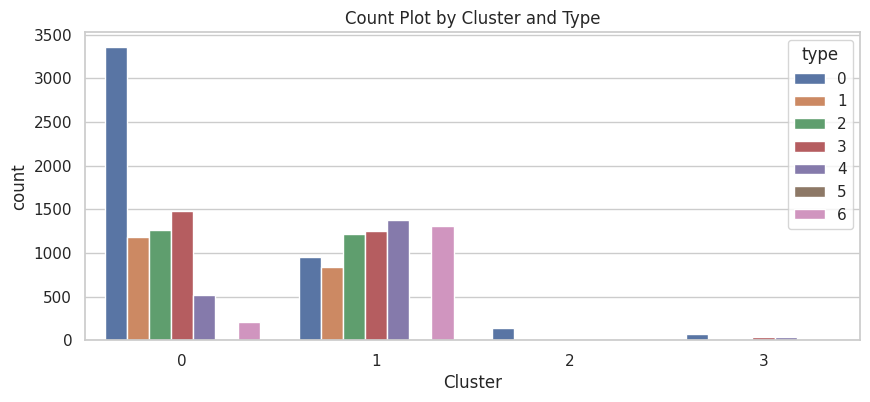

In [125]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df2_kmeans, x='Cluster', hue='type')
plt.title('Count Plot by Cluster and Type')
plt.show()

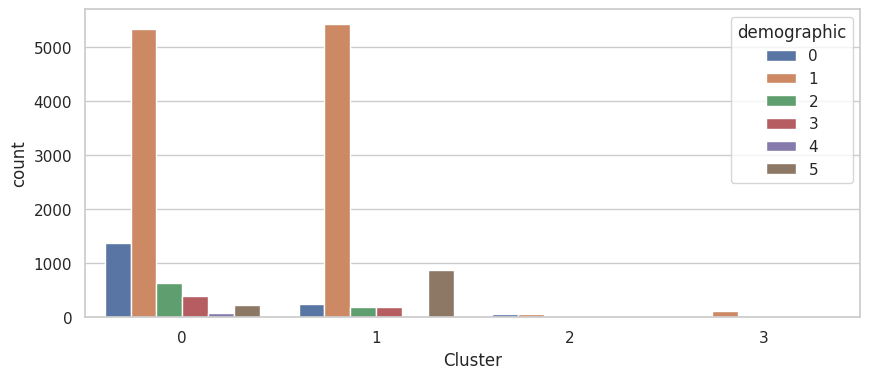

In [126]:
plt.figure(figsize= (10, 4))
sns.countplot(data=df2_kmeans, x='Cluster', hue= 'demographic')
plt.show()

In [127]:
scaler = MinMaxScaler()
X = df2_model
X = scaler.fit_transform(X)

In [128]:
from scipy.cluster.hierarchy import linkage, dendrogram

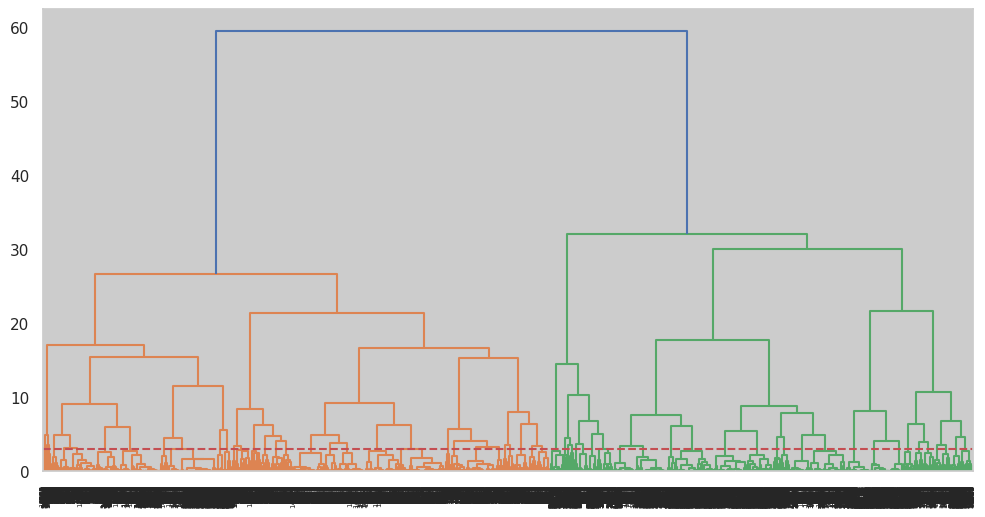

In [129]:
mergings = linkage(X, method='ward')
plt.figure(figsize= (12, 6))
dendrogram(mergings)
plt.axhline(y=3, color = 'r', linestyle = '--')
plt.show()